In [48]:
import pandas as pd
xls = pd.ExcelFile('yelp.xlsx')
df = xls.parse('yelp_data')

c:\Users\alexb\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [49]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1


In [50]:
df_cities = xls.parse('cities')
df_cities.head()

c:\Users\alexb\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,id,city
0,1,Bellevue
1,2,Braddock
2,3,Carnegie
3,4,Homestead
4,5,Mc Kees Rocks


In [51]:
df_states =xls.parse('states')
df_states.head()

c:\Users\alexb\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,id,state
0,1,PA
1,2,NV


In [52]:
df = pd.merge(left = df, right = df_cities, how = 'inner', left_on='city_id', right_on='id')

In [53]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,id,city
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,1,Bellevue
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,1,Bellevue
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,1,Bellevue
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,1,Bellevue
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,1,Bellevue


In [54]:
df = pd.merge(left = df, right = df_states, how = 'inner', left_on='state_id', right_on='id')

In [55]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,id_x,city,id_y,state
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,1,Bellevue,1,PA
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,1,Bellevue,1,PA
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,1,Bellevue,1,PA
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,1,Bellevue,1,PA
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,1,Bellevue,1,PA


In [56]:
atts = ['name','city','state']
df[atts].head(100)

,name,city,state
0,China Sea Chinese Restaurant,Bellevue,PA
1,Discount Tire Center,Bellevue,PA
2,Frankfurters,Bellevue,PA
3,Fred Dietz Floral,Bellevue,PA
4,Kuhn's Market,Bellevue,PA
...,...,...,...
95,Aamco Transmissions,Pittsburgh,PA
96,Animal Rescue League Shelter & Wildlife Center,Pittsburgh,PA
97,Aracri's Greentree Inn,Pittsburgh,PA
98,Atch-Mont Real Estate,Pittsburgh,PA


In [57]:
del df['id_x']

In [58]:
del df['id_y']

In [59]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,Bellevue,PA
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,Bellevue,PA
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,Bellevue,PA
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,Bellevue,PA
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,Bellevue,PA


In [60]:
df[100:200]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
100,Au Bon Pain Co,Food,Bakeries,False,7,3.0,8,1,Pittsburgh,PA
101,Bado's Pizza Grill and Ale House,Italian,Bars,True,93,3.5,8,1,Pittsburgh,PA
102,Bastone Auto Service,Auto Repair,Automotive,False,20,4.0,8,1,Pittsburgh,PA
103,Bellisario's Pizza Palace,Italian,Pizza,True,21,3.5,8,1,Pittsburgh,PA
104,Benedum Center for the Performing Arts,Opera & Ballet,Arts & Entertainment,False,56,4.5,8,1,Pittsburgh,PA
...,...,...,...,...,...,...,...,...,...,...
195,McDonald's,Burgers,Fast Food,True,5,2.0,8,1,Pittsburgh,PA
196,Miller Ace Hardware,Shopping,Hardware Stores,False,5,4.5,8,1,Pittsburgh,PA
197,Minutello's Restaurant & Lounge,Italian,Pizza,True,8,3.0,8,1,Pittsburgh,PA
198,Monro Muffler Brake & Service,Tires,Automotive,False,9,2.0,8,1,Pittsburgh,PA


In [61]:
index = len(df) - 1

last_business = df[index:]

last_business['name']

599    A Sunrise Towing
Name: name, dtype: object

In [62]:
df[-1:]['name']

599    A Sunrise Towing
Name: name, dtype: object

In [63]:
pitts = df['city'] == 'Pittsburgh'

type(pitts)

pandas.core.series.Series

In [64]:
pitts

0      False
1      False
2      False
3      False
4      False
       ...  
595    False
596    False
597    False
598    False
599    False
Name: city, Length: 600, dtype: bool

In [65]:
df[pitts]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
95,Aamco Transmissions,Auto Repair,Automotive,False,21,4.5,8,1,Pittsburgh,PA
96,Animal Rescue League Shelter & Wildlife Center,Animal Shelters,Veterinarians,False,43,4.0,8,1,Pittsburgh,PA
97,Aracri's Greentree Inn,Italian,American (New),True,15,3.5,8,1,Pittsburgh,PA
98,Atch-Mont Real Estate,Real Estate Services,Property Management,False,3,2.0,8,1,Pittsburgh,PA
99,Atria's Restaurant,American (New),Sandwiches,True,69,3.0,8,1,Pittsburgh,PA
...,...,...,...,...,...,...,...,...,...,...
283,Walter's Automotive,Auto Repair,Automotive,False,99,5.0,8,1,Pittsburgh,PA
284,Washington's Landing Marina,Active Life,Boating,False,3,3.0,8,1,Pittsburgh,PA
285,West Liberty Cycles,Sporting Goods,Bikes,False,8,4.5,8,1,Pittsburgh,PA
286,Wiseguys Pizza,Restaurants,Pizza,True,12,3.0,8,1,Pittsburgh,PA


In [66]:
rest = df['name'] == 'The Dragon Chinese Cuisine'
df[rest]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
93,The Dragon Chinese Cuisine,Restaurants,Chinese,True,7,3.0,7,1,Munhall,PA


In [67]:
df[rest]['take_out']

93    True
Name: take_out, dtype: bool

In [68]:
cat_0_bars = df['category_0'] == 'Bars'
cat_1_bars = df['category_1'] == 'Bars'

df[cat_0_bars | cat_1_bars]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
12,Emil's Lounge,Bars,American (New),True,26,4.5,2,1,Braddock,PA
15,Alexion's Bar & Grill,Bars,American (Traditional),True,23,4.0,3,1,Carnegie,PA
32,Rocky's Lounge,Bars,American (Traditional),True,10,4.0,3,1,Carnegie,PA
42,Duke's Upper Deck Cafe,Pubs,Bars,True,33,3.5,4,1,Homestead,PA
62,Randy's Beer Barrel Pub,Pubs,Bars,False,3,2.5,4,1,Homestead,PA
70,TGI Fridays,Bars,American (Traditional),True,23,2.5,4,1,Homestead,PA
77,Applebee's,Bars,American (Traditional),True,9,3.5,5,1,Mc Kees Rocks,PA
101,Bado's Pizza Grill and Ale House,Italian,Bars,True,93,3.5,8,1,Pittsburgh,PA
114,Buffalo Blues,Restaurants,Bars,True,62,3.0,8,1,Pittsburgh,PA
119,Cappy's Cafe,Bars,American (Traditional),True,51,3.0,8,1,Pittsburgh,PA


In [69]:
carnegie = df['city'] == 'Carnegie'

df[(cat_0_bars | cat_1_bars) & carnegie]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
15,Alexion's Bar & Grill,Bars,American (Traditional),True,23,4.0,3,1,Carnegie,PA
32,Rocky's Lounge,Bars,American (Traditional),True,10,4.0,3,1,Carnegie,PA


In [70]:
cat_0 = df['category_0'].isin(["Bars", "Restaurants"])
cat_1 = df['category_1'].isin(["Bars", "Restaurants"])
df[(cat_0 | cat_1) & carnegie]


,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
15,Alexion's Bar & Grill,Bars,American (Traditional),True,23,4.0,3,1,Carnegie,PA
18,Barb's Country Junction Cafe,Restaurants,Cafes,True,9,4.0,3,1,Carnegie,PA
20,Don Don Chinese Restaurant,Restaurants,Chinese,True,10,2.5,3,1,Carnegie,PA
29,Papa J's,Restaurants,Italian,True,81,3.5,3,1,Carnegie,PA
30,Porto Fino Pizzaria & Gyro,Restaurants,Pizza,False,4,2.5,3,1,Carnegie,PA
32,Rocky's Lounge,Bars,American (Traditional),True,10,4.0,3,1,Carnegie,PA


In [71]:
cat_0_dbars = df['category_0'] == 'Dive Bars'
cat_1_dbars = df['category_1'] == 'Dive Bars'
las_vegas = df['city'] == 'Las Vegas'
at_least_4s = df['stars'] >= 4.0

db_4s = df[(cat_0_dbars | cat_1_dbars) & las_vegas & at_least_4s]

In [72]:
import random

In [73]:
rand = random.randint(0, len(db_4s) - 1)
random_db_4s_1 = db_4s[rand: rand + 1]
random_db_4s_1

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state
451,Huntridge Tavern,Dive Bars,Bars,False,50,4.0,12,2,Las Vegas,NV


In [74]:
rand = random.randint(0, len(db_4s) - 1)
random_db_4s_2 = db_4s.iloc[rand]
random_db_4s_2

name            Moon Doggies
category_0         Dive Bars
category_1              Bars
take_out               False
review_count              85
stars                    4.0
city_id                   12
state_id                   2
city               Las Vegas
state                     NV
Name: 453, dtype: object

In [75]:
cat_0_ns = df['category_0'].str.contains("Nail Salon")
cat_1_ns = df['category_1'].str.contains("Nail Salon")
henderson = df['city'] == 'Henderson'

df[(cat_0_ns | cat_1_ns) & henderson]['review_count'].sum()

158

In [76]:
cat_0_ar = df['category_0'].str.contains("Auto Repair")
cat_1_ar = df['category_1'].str.contains("Auto Repair")

df[(cat_0_ar | cat_1_ar) & pitts]['stars'].mean()

4.5

In [77]:
df['rating'] = df['stars']*2

In [78]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,rating
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,Bellevue,PA,5.0
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,Bellevue,PA,9.0
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,Bellevue,PA,9.0
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,Bellevue,PA,8.0
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,Bellevue,PA,7.0


In [79]:
def convert_to_rating(x):
    return(str(x) + " out of 10")

df['rating'] = df['rating'].apply(convert_to_rating)

In [80]:
df.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,rating
0,China Sea Chinese Restaurant,Restaurants,Chinese,True,11,2.5,1,1,Bellevue,PA,5.0 out of 10
1,Discount Tire Center,Tires,Automotive,False,24,4.5,1,1,Bellevue,PA,9.0 out of 10
2,Frankfurters,Restaurants,Hot Dogs,True,3,4.5,1,1,Bellevue,PA,9.0 out of 10
3,Fred Dietz Floral,Shopping,Flowers & Gifts,False,6,4.0,1,1,Bellevue,PA,8.0 out of 10
4,Kuhn's Market,Food,Grocery,False,8,3.5,1,1,Bellevue,PA,7.0 out of 10


In [81]:
df[len(df) - 1 : ]

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,rating
599,A Sunrise Towing,Automotive,Towing,False,4,1.0,13,2,North Las Vegas,NV,2.0 out of 10


In [82]:
type(pitts)

pandas.core.series.Series

In [83]:
bars_rest = df["category_0"].isin(["Bars", "Restaurants"])
df_bars_rest = df[bars_rest]

In [84]:
pivot_state_cat = pd.pivot_table(df_bars_rest, index = ["state", "city", "category_0"])
pivot_state_cat[["review_count", "stars"]]

review_count     stars
state city            category_0                         
NV    Henderson       Bars           171.000000  3.000000
                      Restaurants    102.454545  3.181818
      Las Vegas       Bars            15.500000  4.000000
                      Restaurants    221.153846  3.153846
      North Las Vegas Bars             7.000000  3.500000
                      Restaurants     12.000000  3.000000
PA    Bellevue        Restaurants     14.000000  3.916667
      Braddock        Bars            26.000000  4.500000
      Carnegie        Bars            16.500000  4.000000
                      Restaurants     26.000000  3.125000
      Homestead       Bars            23.000000  2.500000
                      Restaurants      6.000000  2.500000
      Mc Kees Rocks   Bars             9.000000  3.500000
                      Restaurants      7.333333  3.333333
      Munhall         Restaurants      9.500000  3.500000
      Pittsburgh      Bars            20.000000  3.416667
                      Restaurants     67.000000  3.203704
      West Homestead  Bars            92.000000  2.500000
      West Mifflin    Restaurants      5.000000  4.333333

In [85]:
import numpy as np

In [86]:
pivot_agg = pd.pivot_table(
    df, index= ['state', 'take_out'],
    values= ['review_count'],
    aggfunc= [np.sum]
)

pivot_agg

sum
               review_count
state take_out             
NV    False            3921
      True             8035
PA    False            2015
      True             6292

In [87]:
pivot_a2 = pd.pivot_table(
    df, index= ['state', 'city'],
    columns= ['take_out'],
    aggfunc= {'review_count': np.sum, 'stars': np.average}
    
)

pivot_a2

review_count           stars          
take_out                     False  True     False      True
state city                                                  
NV    Henderson               2009  2323  3.469697  3.258065
      Las Vegas               1619  5607  3.423077  3.310345
      North Las Vegas          293   105  3.155172  2.562500
PA    Bellevue                  52   106  3.750000  3.750000
      Braddock                   3    26  5.000000  4.500000
      Carnegie                  74   225  3.269231  3.722222
      Homestead                323   630  3.416667  2.909091
      Mc Kees Rocks             48    59  3.666667  3.714286
      Mount Lebanon             13    12  3.000000  3.500000
      Munhall                   12    79  3.000000  3.000000
      Pittsburgh              1447  5023  3.836364  3.566265
      West Homestead             7   117  4.500000  2.750000
      West Mifflin              36    15  3.500000  4.333333

In [88]:
import matplotlib.pyplot as plt

In [89]:
df_pitt = df[df['city'] == 'Pittsburgh']

df_pitt.head()

,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,rating
95,Aamco Transmissions,Auto Repair,Automotive,False,21,4.5,8,1,Pittsburgh,PA,9.0 out of 10
96,Animal Rescue League Shelter & Wildlife Center,Animal Shelters,Veterinarians,False,43,4.0,8,1,Pittsburgh,PA,8.0 out of 10
97,Aracri's Greentree Inn,Italian,American (New),True,15,3.5,8,1,Pittsburgh,PA,7.0 out of 10
98,Atch-Mont Real Estate,Real Estate Services,Property Management,False,3,2.0,8,1,Pittsburgh,PA,4.0 out of 10
99,Atria's Restaurant,American (New),Sandwiches,True,69,3.0,8,1,Pittsburgh,PA,6.0 out of 10


In [90]:
df_vegas = df[df['city'] == 'Las Vegas']

df_vegas.head()


,name,category_0,category_1,take_out,review_count,stars,city_id,state_id,city,state,rating
430,Reliable Tax Services,Financial Services,Accountants,False,3,4.5,12,2,Las Vegas,NV,9.0 out of 10
431,Paradise Electro Stimulations,Shopping,Adult,False,4,4.5,12,2,Las Vegas,NV,9.0 out of 10
432,The Studio,Shopping,Adult,False,7,5.0,12,2,Las Vegas,NV,10.0 out of 10
433,Boomer's Bar,Bars,American (Traditional),False,19,3.5,12,2,Las Vegas,NV,7.0 out of 10
434,Omelet House,Breakfast & Brunch,American (Traditional),True,703,4.5,12,2,Las Vegas,NV,9.0 out of 10


In [91]:
pitt_stars = df_pitt['stars']
pitt_stars.head()

95    4.5
96    4.0
97    3.5
98    2.0
99    3.0
Name: stars, dtype: float64

In [92]:
vegas_stars = df_vegas['stars']
vegas_stars.head()

430    4.5
431    4.5
432    5.0
433    3.5
434    4.5
Name: stars, dtype: float64

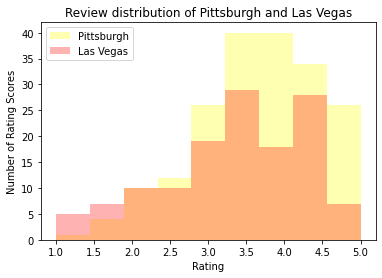

In [96]:
plt.hist(
    pitt_stars,
    alpha= 0.3,
    color= 'yellow',
    label= 'Pittsburgh',
    bins = 'auto'
)

plt.hist(
    vegas_stars,
    alpha= 0.3,
    color= 'red',
    label= 'Las Vegas',
    bins = 'auto'
)

plt.xlabel("Rating")
plt.ylabel("Number of Rating Scores")

plt.legend(loc = "best")

plt.title("Review distribution of Pittsburgh and Las Vegas")

plt.show()

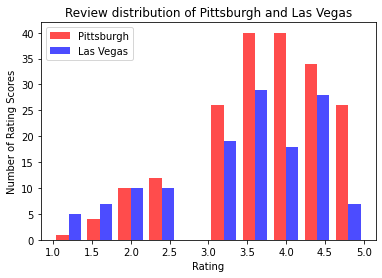

In [98]:
plt.hist(
    [pitt_stars, vegas_stars],
    alpha= 0.7,
    color= ['red', 'blue'],
    label= ['Pittsburgh', 'Las Vegas'],
    bins= 'auto'
)
plt.xlabel("Rating")
plt.ylabel("Number of Rating Scores")

plt.legend(loc = "best")

plt.title("Review distribution of Pittsburgh and Las Vegas")

plt.show()

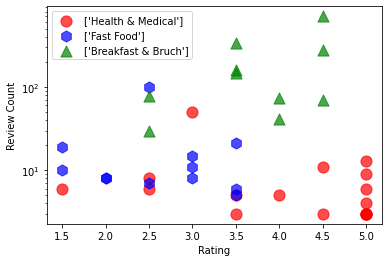

In [111]:
df_health = df[df['category_0'] == 'Health & Medical']
df_fastfood = df[df['category_0'] == 'Fast Food']
df_brunch = df[df['category_0'] == 'Breakfast & Brunch']

plt.scatter(
    df_health['stars'], df_health['review_count'],
    marker= 'o',
    color= 'r',
    alpha= 0.7,
    s = 124,
    label = ['Health & Medical']
)

plt.scatter(
    df_fastfood['stars'], df_fastfood['review_count'],
    marker= 'h',
    color= 'b',
    alpha= 0.7,
    s = 124,
    label = ['Fast Food']
)

plt.scatter(
    df_brunch['stars'], df_brunch['review_count'],
    marker= '^',
    color= 'g',
    alpha= 0.7,
    s = 124,
    label = ['Breakfast & Bruch']
)

plt.xlabel("Rating")
plt.ylabel("Review Count")

plt.legend(loc = "upper left")

axe = plt.gca()
axe.set_yscale('log')

plt.show()